In [19]:
import datetime
import rioxarray
import geojson
import matplotlib.pyplot as plt

# Retile image with given geometry 

In [2]:
# use composite image as test tile
asset_path = "../../data/TestDataSet/S2_comp_first.tif"

# load image to extract information
bands = rioxarray.open_rasterio(asset_path)
bands

<xarray.DataArray (band: 3, y: 10002, x: 10004)>
[300180024 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1 2 3
  * y            (y) float64 -2.667e+05 -2.667e+05 ... -3.667e+05 -3.667e+05
  * x            (x) float64 -1.654e+06 -1.654e+06 ... -1.554e+06 -1.554e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     ('B4_first', 'B3_first', 'B2_first')
    grid_mapping:  spatial_ref

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


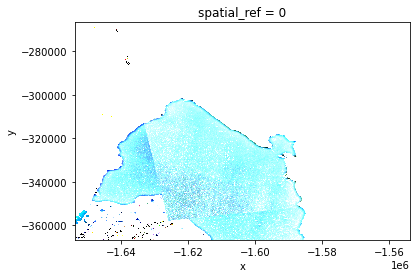

In [22]:
# View the imported image
bands.plot.imshow()

In [16]:
# Define a polygon to crop under WGS84
geometry_str = ''' {"type": "Polygon",
                "coordinates": [
                [[-102.1343994140625,-75.17454893148678],
                [-101.3323974609374,-75.17454893148671],
                [-101.3323974609374,-74.98787519162482],
                [-102.1343994140625,-74.98787519162481],
                [-102.1343994140625,-75.17454893148678]]]}'''
geometry_crop = [geojson.loads(geometry_str)]


# Crop with the given polygon in WGS84
cropped = bands.rio.clip(geometries=geometry_crop, crs=4326)
cropped

<xarray.DataArray (band: 3, y: 2653, x: 2483)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)
Coordinates:
  * y            (y) float64 -3.182e+05 -3.182e+05 ... -3.447e+05 -3.448e+05
  * x            (x) float64 -1.608e+06 -1.608e+06 ... -1.583e+06 -1.583e+06
  * band         (band) int64 1 2 3
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     ('B4_first', 'B3_first', 'B2_first')
    grid_mapping:  spatial_ref

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


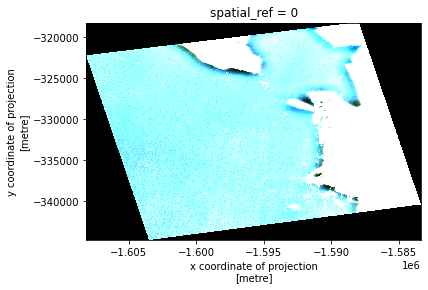

In [23]:
cropped.plot.imshow()